# Data visualization

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from highcharts import Highchart

- This notebook explains the basics of visualizing data in Python. 
- We will use for this example the data [Chicago Park District: Movies in the Parks 2019](https://catalog.data.gov/dataset/chicago-park-district-movies-in-the-parks-2019), which according to the website lists all Movies in the Parks events in Chicago in 2019. 

In [26]:
df = pd.read_csv("https://data.cityofchicago.org/api/views/7piw-z6r6/rows.csv?accessType=DOWNLOAD")
df.head()

,Day,Date,Park,Park Phone,Title,CC,Rating,Underwriter,Park Address,Location
0,Thu,06/27/2019,Austin Town Hall,(773) 287-7658,Black Panther,Y,PG-13,NaN,5610 W. Lake St.,"(41.88784692, -87.76559245)"
1,Mon,07/08/2019,Calumet Park,(312) 747-6039,The Wizard of Oz,Y,G,NaN,9801 S. Ave G,"(41.71772004, -87.53150812)"
2,Thu,08/01/2019,Harrison Park,(312) 746-5491,Black Panther,Y,PG-13,NaN,1824 S. Wood St.,"(41.85692162, -87.67122476)"
3,Thu,07/18/2019,Hoard Playground Park,(773) 256-1903,Black Panther,Y,PG-13,NaN,7201 S. Dobson Ave.,"(41.7640317, -87.59928813)"
4,Fri,06/07/2019,Berger Park Cultural Center,(773) 761-0376,Some Like It Hot,Y,NR,NaN,6205 N. Sheridan Rd.,"(41.99480562, -87.65538421)"


## Count of movies by month

- Since we want to group by year and month, we start by casting the `Date` column as datetime.
- In SQL this would be something like `CAST(Date AS DATE)` or `Date::DATE`

In [49]:
# Cast Date column as datetime
df['Date'] = pd.to_datetime(df['Date'])
# Now that the column is parsed as datetime, we can extract year and month
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str) 
df.head()

,Day,Date,Park,Park Phone,Title,CC,Rating,Underwriter,Park Address,Location,year,month,year_month
0,Thu,2019-06-27,Austin Town Hall,(773) 287-7658,Black Panther,Y,PG-13,NaN,5610 W. Lake St.,"(41.88784692, -87.76559245)",2019,6,2019-6
1,Mon,2019-07-08,Calumet Park,(312) 747-6039,The Wizard of Oz,Y,G,NaN,9801 S. Ave G,"(41.71772004, -87.53150812)",2019,7,2019-7
2,Thu,2019-08-01,Harrison Park,(312) 746-5491,Black Panther,Y,PG-13,NaN,1824 S. Wood St.,"(41.85692162, -87.67122476)",2019,8,2019-8
3,Thu,2019-07-18,Hoard Playground Park,(773) 256-1903,Black Panther,Y,PG-13,NaN,7201 S. Dobson Ave.,"(41.7640317, -87.59928813)",2019,7,2019-7
4,Fri,2019-06-07,Berger Park Cultural Center,(773) 761-0376,Some Like It Hot,Y,NR,NaN,6205 N. Sheridan Rd.,"(41.99480562, -87.65538421)",2019,6,2019-6


- Now we are ready to count the number of movies per month

In [51]:
cntmovies = df.groupby('year_month').size().reset_index().rename({0:'cnt_movies'}, axis=1)
cntmovies.head()

,year_month,cnt_movies
0,2019-6,59
1,2019-7,77
2,2019-8,72
3,2019-9,2


- Let's make a bar chart to display the same information. 

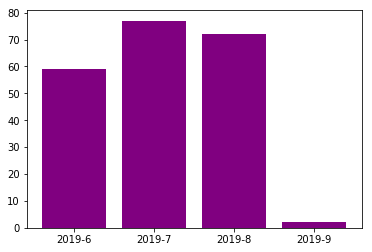

In [56]:
plt.bar(cntmovies.year_month, cntmovies.cnt_movies, color='purple')
plt.show()

- We can make format it in many different ways. 

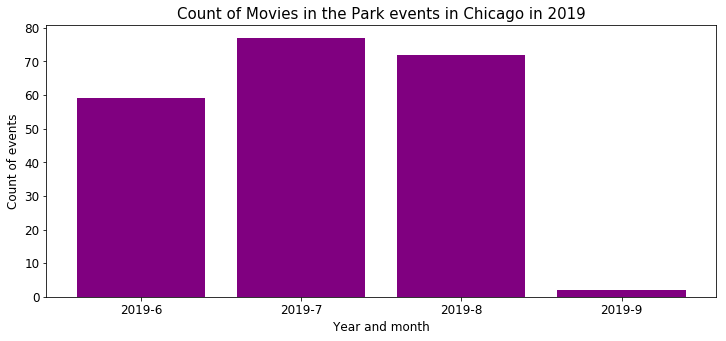

In [65]:
plt.figure(figsize=(12, 5))
plt.bar(cntmovies.year_month, cntmovies.cnt_movies, color='purple')
plt.title('Count of Movies in the Park events in Chicago in 2019', size=15)
plt.xlabel("Year and month", size=12)
plt.ylabel("Count of events", size=12)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

- We can also use Highcharts to create interactive charts!

In [74]:
# Format JavaScript
options = {'title': {'text': "Count of Movies in the Park events in Chicago in 2019"},
           'xAxis': {'categories': cntmovies.year_month.tolist(), 
                     'title': {'text': 'Year and month'}},
           'yAxis': {'title': { 'text': 'Count of events'},
                     'labels': {'overflow': 'justify'},
                     'gridLineWidth': 0,
                     'minorGridLineWidth': 0},
           'plotOptions': {'bar': {'dataLabels': {'enabled': True}},
                           'series': {'lineWidth': 5}}}
H = Highchart()
H.set_dict_options(options)
H.add_data_set(cntmovies.cnt_movies.tolist(), 'bar', 'Count of events', color='#1F618D')
H